<a href="https://colab.research.google.com/github/bbybsod/kursPrediksi_MachineLearning/blob/main/kurs_prediksi_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load Data

Saving kurs_usd_idr.csv to kurs_usd_idr (2).csv


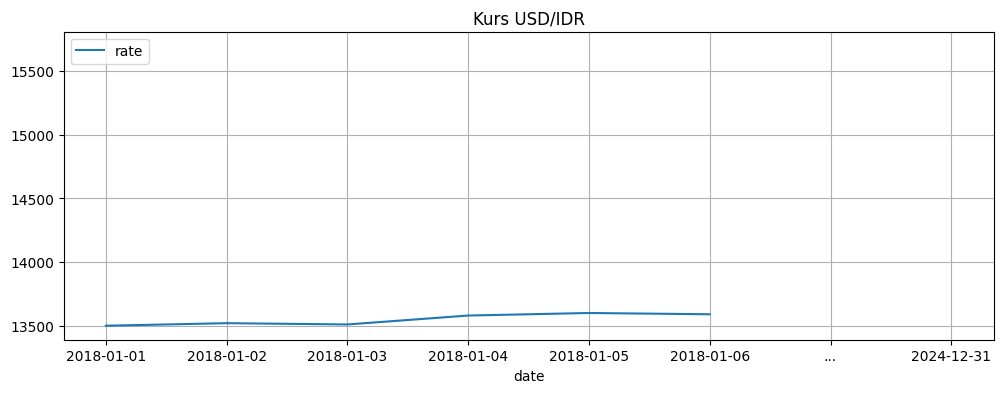

In [6]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('kurs_usd_idr.csv', parse_dates=['date'], index_col='date')
df = df[['rate']]
df.plot(figsize=(12,4), title='Kurs USD/IDR')
plt.grid()
plt.show()

# Preprocessing

In [23]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.values.reshape(-1, 1))

## fungsi dataset



In [25]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)
print("Jumlah data:", len(scaled))

Jumlah data: 8


# window size

In [32]:
window_size = 60

## jumlah data

In [33]:
jumlah_data = len(scaled)
print("Jumlah data:", jumlah_data)

Jumlah data: 8


## sesuaikan window size

In [34]:
if jumlah_data <= window_size:
    window_size = max(1, jumlah_data - 1)
    print(f"⚠️  Window size terlalu besar, diubah ke: {window_size}")

⚠️  Window size terlalu besar, diubah ke: 7


## dataset

In [27]:
X, y = create_dataset(scaled, window_size)

## debug

In [28]:
print("X shape sebelum reshape:", X.shape)
print("y shape sebelum reshape:", y.shape)

X shape sebelum reshape: (0,)
y shape sebelum reshape: (0,)


# Reshape ke 3 Dimensi

In [51]:
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1, 1)
print("X shape setelah reshape:", X.shape)
print("y shape setelah reshape:", y.shape)

X shape setelah reshape: (0, 0, 1)
y shape setelah reshape: (0, 1)


# split train test

In [8]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Bangun model LSTM

In [43]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(64),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

# Training model

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))  # LSTM tunggal
model.add(Dense(1))  # Output 1 nilai

model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


ValueError: Exception encountered when calling LSTM.call().

[1mslice index 0 of dimension 1 out of bounds. for '{{node sequential_3_1/lstm_5_1/strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=5, ellipsis_mask=0, end_mask=5, new_axis_mask=0, shrink_axis_mask=2](data, sequential_3_1/lstm_5_1/strided_slice/stack, sequential_3_1/lstm_5_1/strided_slice/stack_1, sequential_3_1/lstm_5_1/strided_slice/stack_2)' with input shapes: [32,0,1], [3], [3], [3] and with computed input tensors: input[1] = <0 0 0>, input[2] = <0 1 0>, input[3] = <1 1 1>.[0m

Arguments received by LSTM.call():
  • sequences=tf.Tensor(shape=(32, 0, 1), dtype=float32)
  • initial_state=None
  • mask=None
  • training=True